#**¿COMO LA INTELIGENCIA ARTIFICAL PUEDE CREAR ROSTROS DE PERSONAS QUE NO EXISTEN?**

---



Los rostros sintéticos se crean principalmente con redes generativa.

Redes generativas: Es un tipo de modelos diseñado para crear datos nuevos y para lograrlo aprenden de la distribución estadística de los datos de entrada (imágenes, texto, audio, etc.) para luego ser capaces de producir nuevos ejemplos

Ejemplos:
*   GANs (Generative Adversarial Networks): Inventadas en 2014 por Ian Goodfellow. Este modelo tiene dos redes, ***Generador:*** crea imágenes falsas (rostros) y ***Discriminador:*** intenta diferenciar entre un rostro real y uno falso.
https://www.youtube.com/watch?v=RAa55G-oEuk
https://www.youtube.com/watch?v=TpMIssRdhco

*   VAEs (Variational Autoencoders): Aprenden a codificar los datos en un "espacio latente" y luego decodificarlos para generar nuevas muestras. Son más estables que las GANs, aunque menos realistas en imágenes.
https://www.youtube.com/watch?v=qiUEgSCyY5o
https://www.youtube.com/watch?v=qJeaCHQ1k2w

*   Modelos de difusión (Diffusion Models): Añaden ruido a los datos y luego aprenden a revertir ese ruido para generar nuevas muestras desde ruido puro.Se usan hoy en día en sistemas como Stable Diffusion o Imagen de Google para generar imágenes realistas.
https://www.youtube.com/watch?v=EhndHhIvWWw
https://www.youtube.com/watch?v=1pgiu--4W3I

*   Modelos autoregresivos: Generan dato por dato de forma secuencial (ejemplo: un texto palabra por palabra, o una melodía nota por nota).
https://www.youtube.com/watch?v=Lf3qSLZ-WAA


---






**¿De dónde toman los rasgos?**

Los modelos se entrenan con grandes bases de datos de fotos de personas reales

Ejemplos de bases de datos:

*   CelebA-HQ: base de datos de celebridades
*   FFHQ (Flickr-Faces-HQ): 70.000 fotos de alta calidad, variadas en edad, género, raza, etc.

El modelo no copia una cara específica. Lo que hace es aprender patrones


---





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Tobinakano/datasets-colab/refs/heads/main/diabetes.csv?token=GHSAT0AAAAAADMTOELOJ777OAU6P3XR722U2HNKXHA'
df = pd.read_csv(url)

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Ver valores faltantes
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#Eliminar filas duplicadas
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Asignar variables
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Antes del balanceo:")
print(y_train.value_counts(normalize=True))
print("\nDespués del balanceo:")
print(y_train_bal.value_counts(normalize=True))


Antes del balanceo:
Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Después del balanceo:
Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
medias = df.mean(numeric_only=True)
medianas = df.median(numeric_only=True)

comparacion = pd.DataFrame({
    'Media': medias,
    'Mediana': medianas,
    'Diferencia (Media - Mediana)': medias - medianas
})

comparacion

,Media,Mediana,Diferencia (Media - Mediana)
Pregnancies,3.845052,3.0000,0.845052
Glucose,120.894531,117.0000,3.894531
BloodPressure,69.105469,72.0000,-2.894531
SkinThickness,20.536458,23.0000,-2.463542
Insulin,79.799479,30.5000,49.299479
BMI,31.992578,32.0000,-0.007422
DiabetesPedigreeFunction,0.471876,0.3725,0.099376
Age,33.240885,29.0000,4.240885
Outcome,0.348958,0.0000,0.348958


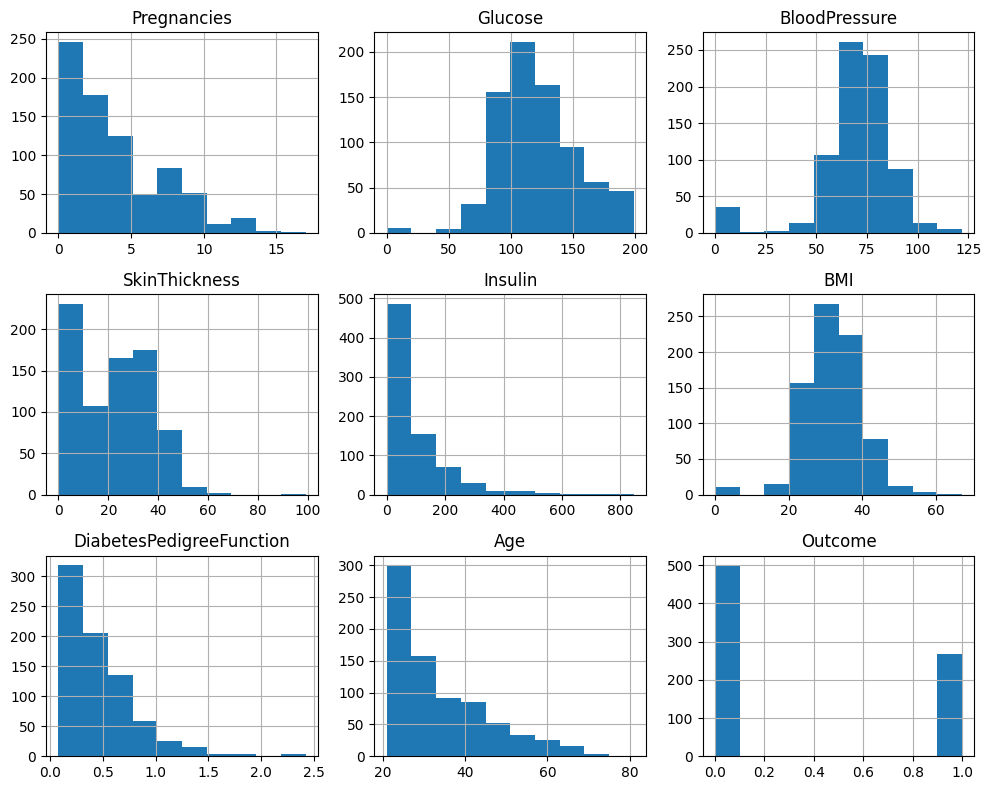

In [ ]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [ ]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0


In [ ]:
# Unir X escalado con la variable objetivo original
df_final = pd.concat([X_scaled, y], axis=1)

# Mostrar primeras filas
df_final.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo
modelo_lineal = LinearRegression()

# Entrenar el modelo con los datos balanceados y escalados
modelo_lineal.fit(X_train_bal, y_train_bal)

# Predecir con los datos de prueba (escalados)
y_pred = modelo_lineal.predict(X_test)

In [ ]:
# Convertir predicciones continuas en 0 o 1
y_pred_class = [1 if y >= 0.5 else 0 for y in y_pred]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       150
           1       0.65      0.72      0.68        81

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Matriz de confusión:
 [[119  31]
 [ 23  58]]


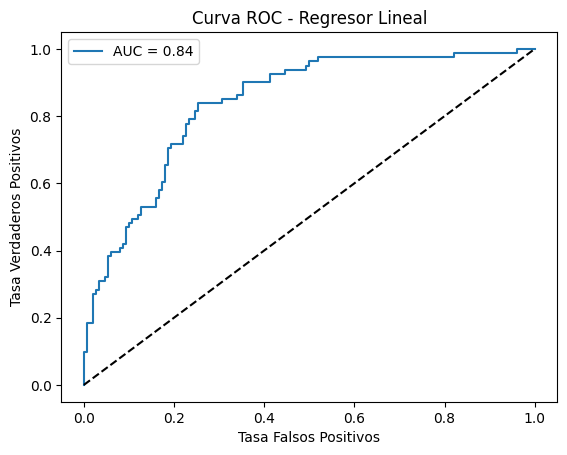

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Métricas básicas
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_class))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_class))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC - Regresor Lineal')
plt.legend()
plt.show()